In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import cv2
import os
from glob import glob

# Path to your folder with .jpg images
image_folder = '/content/drive/MyDrive/MIAS_third_try/RGB_jpg_images'  # Change this to your folder
image_paths = glob(os.path.join(image_folder, '*.jpg'))

# Check first 5 images as a sample
for path in image_paths[:5]:
    img = cv2.imread(path)  # Default reads as BGR (3-channel)
    img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    height, width = img.shape[:2]
    channels = img.shape[2] if len(img.shape) == 3 else 1
    is_grayscale = (channels == 1) or (img == img_gray[..., None]).all()

    print(f"File: {os.path.basename(path)}")
    print(f"  Size: {width} x {height}")
    print(f"  Channels: {channels}")
    print(f"  Grayscale: {'Yes' if is_grayscale else 'No'}")
    print("-" * 40)

File: mdb003.jpg
  Size: 1024 x 1024
  Channels: 3
  Grayscale: Yes
----------------------------------------
File: mdb002.jpg
  Size: 1024 x 1024
  Channels: 3
  Grayscale: Yes
----------------------------------------
File: mdb007.jpg
  Size: 1024 x 1024
  Channels: 3
  Grayscale: Yes
----------------------------------------
File: mdb006.jpg
  Size: 1024 x 1024
  Channels: 3
  Grayscale: Yes
----------------------------------------
File: mdb001.jpg
  Size: 1024 x 1024
  Channels: 3
  Grayscale: Yes
----------------------------------------


In [33]:
import os
import cv2

# ==== 1. Set your image path and YOLO annotation folder ====
img = '/content/drive/MyDrive/MIAS_third_try/RGB_jpg_images/mdb213.jpg'         # Change to your actual image path
annotation_dir = '/content/drive/MyDrive/MIAS_third_try/yolo_labels'    # Folder where .txt YOLO annotations are stored

# ==== 2. Build .txt file path based on image filename ====
image_name = os.path.basename(img)
base_name = os.path.splitext(image_name)[0]
annotation_path = os.path.join(annotation_dir, base_name + '.txt')

# ==== 3. Load the image ====
image = cv2.imread(img)
if image is None:
    raise FileNotFoundError(f"Image not found: {img}")
height, width = image.shape[:2]

# ==== 4. Read and convert YOLO-format annotations ====
bboxes = []  # List of (x, y, w, h)
class_ids = []

if os.path.exists(annotation_path):
    with open(annotation_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue  # Skip malformed lines

            class_id, x_center, y_center, w, h = map(float, parts)
            class_ids.append(int(class_id))

            # Convert relative YOLO coords to absolute pixel values
            abs_x = int((x_center - w / 2) * width)
            abs_y = int((y_center - h / 2) * height)
            abs_w = int(w * width)
            abs_h = int(h * height)

            bboxes.append((abs_x, abs_y, abs_w, abs_h))
else:
    print(f"❌ No annotation found: {annotation_path}")

# ==== 5. Print out results ====
print(f"✅ Bounding boxes for '{image_name}':")
for i, bbox in enumerate(bboxes):
    print(f" Class: {class_ids[i]} | x: {bbox[0]}, y: {bbox[1]}, w: {bbox[2]}, h: {bbox[3]}")

✅ Bounding boxes for 'mdb213.jpg':
 Class: 1 | x: 502, y: 459, w: 90, h: 90


In [34]:
import matplotlib.pyplot as plt
def draw_bboxes_on_image(image, bboxes, class_ids=None, box_color=(0, 255, 0), thickness=2):
    """Draws bounding boxes on the image and returns the result."""
    img_copy = image.copy()

    for i, (x, y, w, h) in enumerate(bboxes):
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), box_color, thickness)

        if class_ids is not None:
            label = str(class_ids[i])
            cv2.putText(img_copy, f"Class {label}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, box_color, 2)

    return img_copy  # ✅ Add this line

# def draw_bboxes_on_image(image, bboxes, class_ids=None, box_color=(0, 255, 0), thickness=2):
#     """Draws bounding boxes on the image."""
#     img_copy = image.copy()

#     for i, (x, y, w, h) in enumerate(bboxes):
#         # Draw rectangle
#         cv2.rectangle(img_copy, (x, y), (x + w, y + h), box_color, thickness)

#         # Draw label if class_ids are provided
#         if class_ids is not None:
#             label = str(class_ids[i])
#             cv2.putText(img_copy, f"Class {label}", (x, y - 10),
#                         cv2.FONT_HERSHEY_SIMPLEX, 0.6, box_color, 2)

#     # Convert BGR to RGB for matplotlib display
#     img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

#     # Show the image
#     plt.figure(figsize=(8, 8))
#     plt.imshow(img_rgb)
#     plt.axis('off')
#     plt.title("Image with Bounding Boxes")
#     plt.show()

In [35]:
draw_bboxes_on_image(image, bboxes, class_ids)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

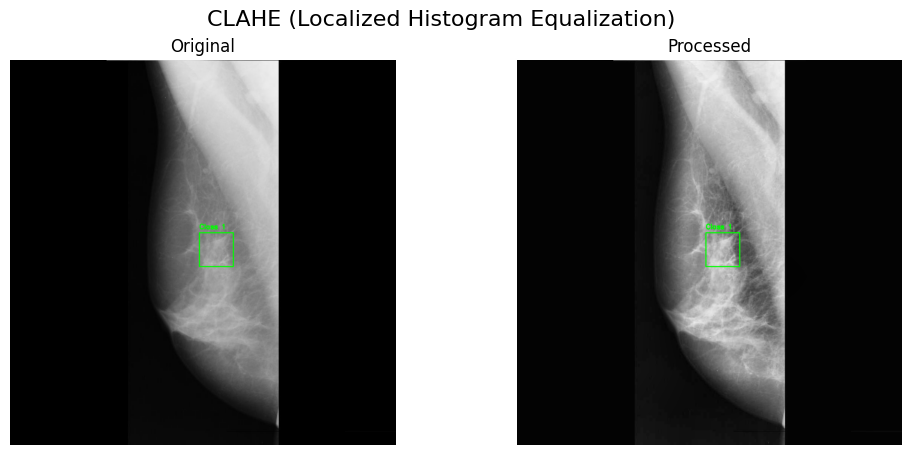

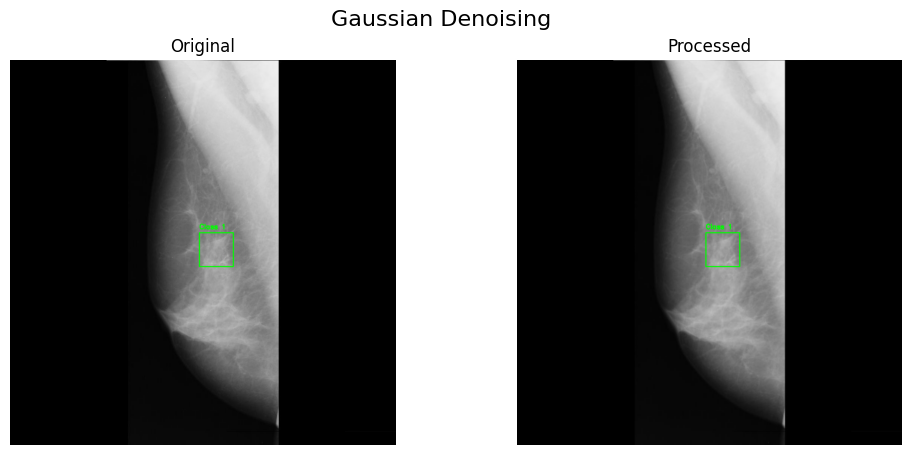

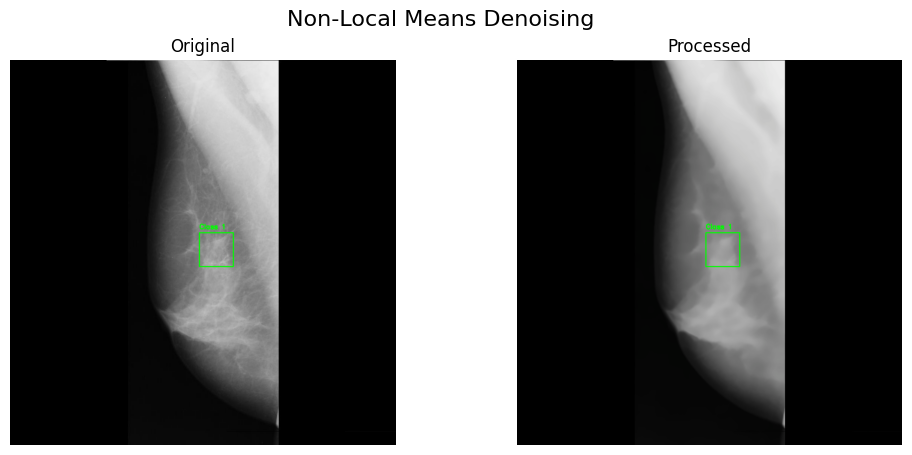

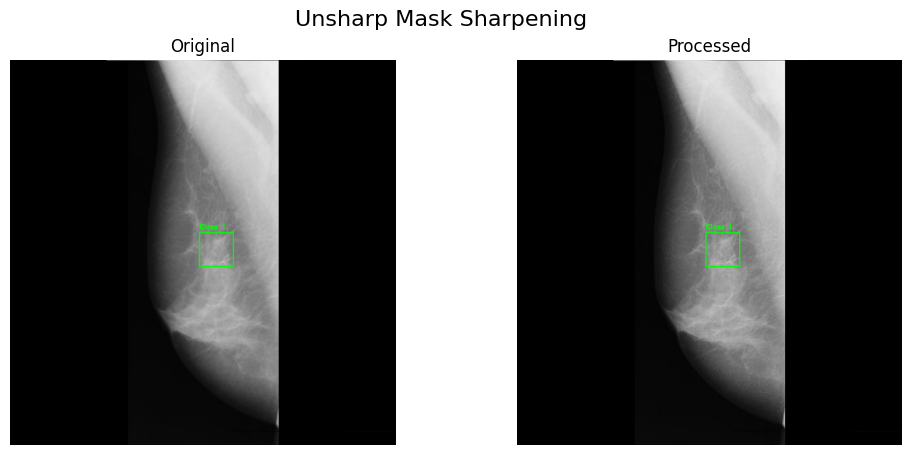

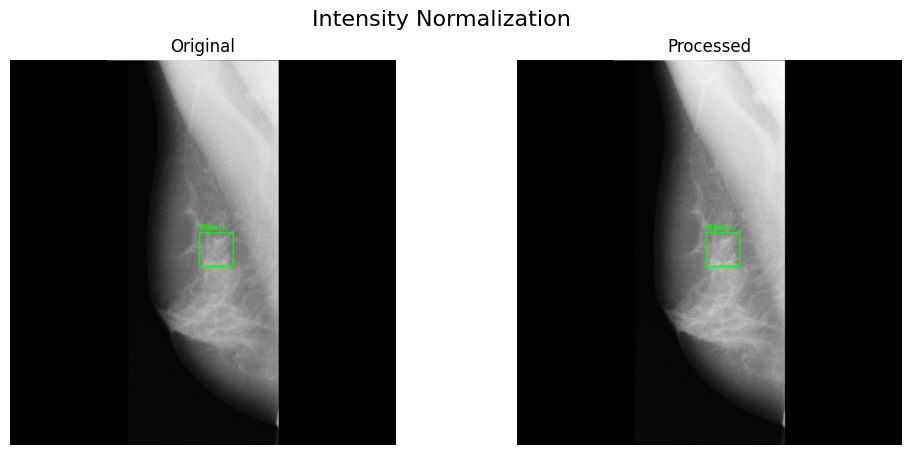

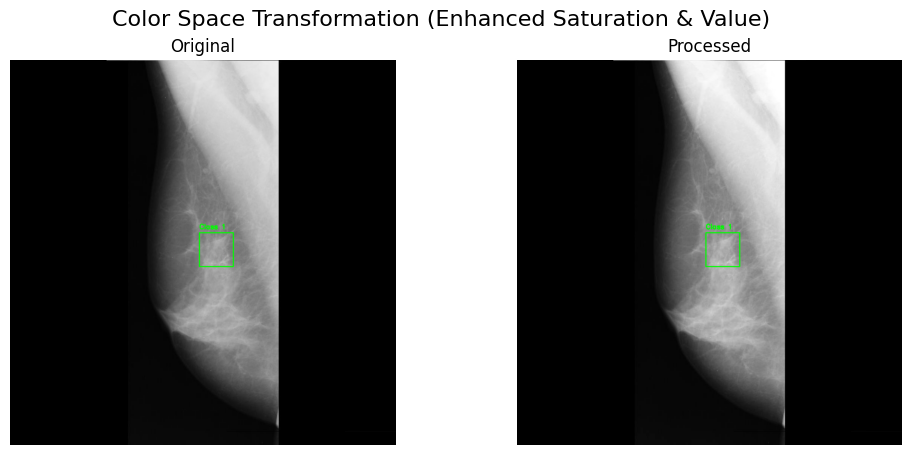

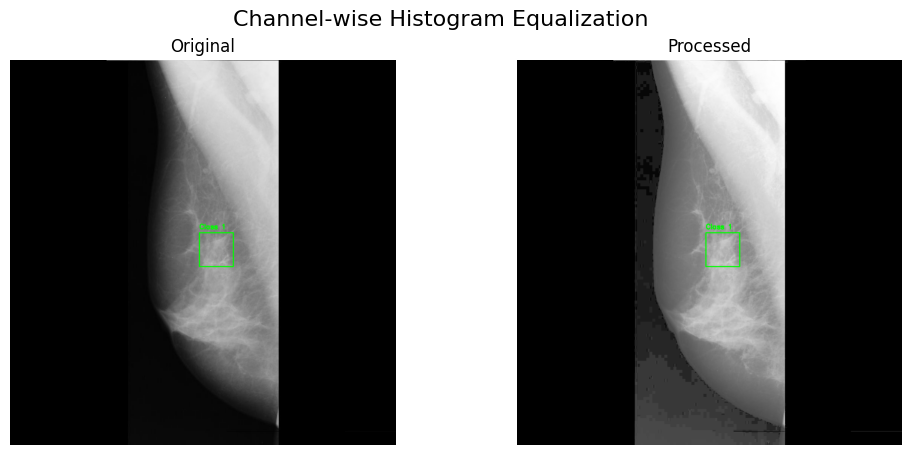

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# # A helper function to draw bounding boxes on an image.
# def draw_bboxes(img, bboxes, color=(0,255,0), thickness=2):
#     """
#     Draw bounding boxes on the input image.
#     bboxes should be a list of tuples: (x, y, w, h)
#     """
#     img_with_boxes = img.copy()
#     for bbox in bboxes:
#         x, y, w, h = bbox
#         cv2.rectangle(img_with_boxes, (x, y), (x+w, y+h), color, thickness)
#     return img_with_boxes
# Define each processing method

# 1. CLAHE - Contrast Limited Adaptive Histogram Equalization on the luminance channel
def apply_clahe_rgb(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])
    img_clahe = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_clahe

# 2. Denoising
# a) Gaussian blur denoising:
def apply_gaussian_denoising(img, kernel_size=(3,3)):
    # Using a small kernel to smooth noise without blurring details too much.
    return cv2.GaussianBlur(img, kernel_size, 0)

# b) Non-local Means Denoising
def apply_nlmeans_denoising(img):
    # fastNlMeansDenoisingColored requires an image in 8-bit.
    return cv2.fastNlMeansDenoisingColored(img, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)

# 3. Sharpening using Unsharp Masking
def apply_unsharp_mask(img, kernel_size=(5,5), sigma=1.0, amount=1.5, threshold=0):
    # Gaussian blur the image
    blurred = cv2.GaussianBlur(img, kernel_size, sigma)
    # Calculate the unsharp mask
    sharpened = float(amount + 1) * img - float(amount) * blurred
    # Clip the values to [0, 255]
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    if threshold > 0:
        low_contrast_mask = np.absolute(img - blurred) < threshold
        np.copyto(sharpened, img, where=low_contrast_mask)
    return sharpened

# 4. Intensity Normalization: scale intensities to [0,255]
def apply_intensity_normalization(img):
    # Convert image to float, normalize and then scale back.
    img_float = img.astype(np.float32)
    norm_img = cv2.normalize(img_float, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return norm_img.astype(np.uint8)

# 5. Color Space Transformations (within RGB)
# For example: enhance saturation and brightness slightly in HSV and convert back.
def apply_color_space_transformation(img, saturation_scale=1.2, value_scale=1.1):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float32)
    hsv[:,:,1] = np.clip(hsv[:,:,1] * saturation_scale, 0, 255)
    hsv[:,:,2] = np.clip(hsv[:,:,2] * value_scale, 0, 255)
    hsv = hsv.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# 6. Channel-wise Operations
# For instance, applying simple histogram equalization per channel independently.
def apply_channel_wise_equalization(img):
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))
    return cv2.merge(eq_channels)

# Visualization function: plot the original and processed images side by side with bounding boxes.
def visualize_processing(original_img, processed_img, bboxes, title=''):
    # Draw bounding boxes on original and processed images.
    orig_with_boxes = draw_bboxes_on_image(original_img, bboxes,class_ids)
    proc_with_boxes = draw_bboxes_on_image(processed_img, bboxes,class_ids)

    plt.figure(figsize=(12,5))
    plt.suptitle(title, fontsize=16)

    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(orig_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(proc_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title('Processed')
    plt.axis('off')

    plt.show()

# # ----- Example usage -----
# # Load a sample image (ensure you have an image in your Colab environment)
# # You can upload your images using the "Files" pane or use cv2.imread('path/to/image.jpg')
# sample_image_path = 'path/to/your/sample_image.jpg'  # update this path
# original_img = cv2.imread(sample_image_path)
# if original_img is None:
#     raise ValueError("Could not load the image. Check the file path.")

# # Dummy bounding box(es): (x, y, w, h)
# # Replace with your actual tumor annotations.
# dummy_bboxes = [(50, 50, 100, 150)]  # sample bbox; update coordinates as needed

# Apply each processing operation and visualize.

# 1. CLAHE
img_clahe = apply_clahe_rgb(image)
visualize_processing(image, img_clahe, bboxes, title='CLAHE (Localized Histogram Equalization)')

# 2a. Gaussian denoising
img_gaussian = apply_gaussian_denoising(image)
visualize_processing(image, img_gaussian, bboxes, title='Gaussian Denoising')

# 2b. Non-local means denoising
img_nlmeans = apply_nlmeans_denoising(image)
visualize_processing(image, img_nlmeans, bboxes, title='Non-Local Means Denoising')

# 3. Sharpening (Unsharp Mask)
img_sharpened = apply_unsharp_mask(image)
visualize_processing(image, img_sharpened, bboxes, title='Unsharp Mask Sharpening')

# 4. Intensity Normalization
img_normalized = apply_intensity_normalization(image)
visualize_processing(image, img_normalized, bboxes, title='Intensity Normalization')

# 5. Color Space Transformation
img_color_transformed = apply_color_space_transformation(image)
visualize_processing(image, img_color_transformed, bboxes, title='Color Space Transformation (Enhanced Saturation & Value)')

# 6. Channel-wise Equalization
img_channel_eq = apply_channel_wise_equalization(image)
visualize_processing(image, img_channel_eq, bboxes, title='Channel-wise Histogram Equalization')